# Spotify Song Popularity Prediction

## 1. To understand and find the factors that drive the popularity of tracks on Spotify Music App
## 2.  Predicting whether  a track will be popular or not

#### Dataset Link : https://www.kaggle.com/huanntran100/spotify-song-popularity-prediction/data

In [413]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [414]:
df = pd.read_csv("SpotifyFeatures.csv")
df.sample(n=5)
df1 = df.copy()

Audio_Features

#acousticness: number<float>
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
>= 0<= 1
#analysis_url: string
A URL to access the full audio analysis of this track. An access token is required to access this data.
#Danceability: number<float>
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
#duration_ms: integer
The duration of the track in milliseconds.
#Energy: number<float>
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
#Id: string
The Spotify ID for the track.
#Instrumentalness: number<float>
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
#Key: integer
The key the track is in. Integers map to pitches using standard 
#Liveness: number<float>
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
#Loudness: number<float>
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
#Mode: integer
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
#Speechiness: number<float>
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
#Tempo: number<float>
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
#time_signature: integer
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
#track_href: string
A link to the Web API endpoint providing full details of the track.
#Type: string
Allowed value:"audio_features"
#Uri: string
The Spotify URI for the track.
#Valence: number<float>
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
#popularity: integer
For each tunable track attribute, a hard ceiling on the selected track attribute’s value can be provided. See tunable track attributes below for the list of available options. For example, max_instrumentalness=0.35 would filter out most tracks that are likely to be instrumental.
>= 0 <= 100
 
#### Link : https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features





In [415]:
df.shape

(228159, 18)

#### The data set almost 2.28 lac of records having 18 features

In [416]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

### Exploratory Data Analysis

In [417]:
df.isnull().sum()  # Checking for null values

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [418]:
df.info()  # Checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228159 entries, 0 to 228158
Data columns (total 18 columns):
genre               228159 non-null object
artist_name         228159 non-null object
track_name          228159 non-null object
track_id            228159 non-null object
popularity          228159 non-null int64
acousticness        228159 non-null float64
danceability        228159 non-null float64
duration_ms         228159 non-null int64
energy              228159 non-null float64
instrumentalness    228159 non-null float64
key                 228159 non-null object
liveness            228159 non-null float64
loudness            228159 non-null float64
mode                228159 non-null object
speechiness         228159 non-null float64
tempo               228159 non-null float64
time_signature      228159 non-null object
valence             228159 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 31.3+ MB


In [419]:
df["number_of_songs"] = np.arange(1,len(df)+1)  # Setting index with total number of tracks
df = df.set_index(df["number_of_songs"])
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,number_of_songs
number_of_songs,,,,,,,,,,,,,,,,,,,
1,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886,1
2,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690,2
3,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696,3
4,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380,4
5,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382,5


In [420]:
popular_tracks = df.sort_values(by = "popularity",ascending = False)  # Sorting the data with respect to poularity
popular_tracks.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,number_of_songs
number_of_songs,,,,,,,,,,,,,,,,,,,
12711,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,12711
159006,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319,159006
12710,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385,12710
12709,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,12709
159005,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335,159005


In [421]:
df.duplicated().any()  # Checking for duplicated rows

False

#### Here we can see though there are no duplicated rows but there are some duplicated tracks under different genre

#### Here we have grouped the similar records by track_name and artist_name and have considered only one record that is latest updated

In [422]:
df = df.loc[popular_tracks.groupby(['track_name', 'artist_name'])['number_of_songs'].idxmax()]

In [423]:
df[df["track_name"] == "Home"]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,number_of_songs
number_of_songs,,,,,,,,,,,,,,,,,,,
189422,Soul,Aftertheparty,Home,6DZJcpRXCvuohQvQfEITxu,43,0.15900,0.877,128764,0.2820,0.000004,C,0.0971,-14.606,Major,0.1100,130.033,4/4,0.2450,189422
156000,Country,Alan Jackson,Home,5F9vMg6m2ulsjchLUIQu3V,43,0.23600,0.645,197920,0.3310,0.000000,C,0.3630,-8.020,Major,0.0285,83.919,4/4,0.4910,156000
82826,Classical,Andrew York,Home,36sBjWHKTdWUae3kIlwrZd,37,0.98900,0.450,274400,0.0827,0.951000,D,0.1010,-18.629,Major,0.0822,81.535,4/4,0.4240,82826
151786,Country,Blake Shelton,Home,3oTC5qoKq6nvz4Jj0DgCzF,55,0.47900,0.380,230453,0.4430,0.000003,G,0.1100,-6.972,Major,0.0268,63.122,4/4,0.2810,151786
92177,Children’s Music,Blue October,Home,4ChdLsuadEtrpomCKiXmQf,48,0.13000,0.580,247462,0.5770,0.000000,A,0.2590,-6.178,Major,0.0565,170.025,4/4,0.4820,92177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200737,World,United Pursuit,Home,29IGlc7zrjwkxACK0SvpYy,41,0.17900,0.481,257373,0.3760,0.477000,A,0.1330,-9.383,Major,0.0271,133.948,4/4,0.0787,200737
146851,Indie,Vacations,Home,15fSe0A90WtPu1wHqCCWcB,49,0.00562,0.644,145667,0.6720,0.000644,A,0.1070,-5.438,Minor,0.0246,89.868,4/4,0.4120,146851
106315,Hip-Hop,Vince Staples,Home,7pBsquIkbED6W6uSQJGbkn,74,0.00608,0.604,211360,0.7360,0.109000,A#,0.1100,-5.596,Minor,0.0555,118.012,4/4,0.3450,106315


In [424]:
df.shape

(153623, 19)

#### Now we have around 1.53 lac records. We will investigate overall trends in the data to get a good idea of which variables correlate with each other as well as have other associations.

#### Checking Distribution of Popularity

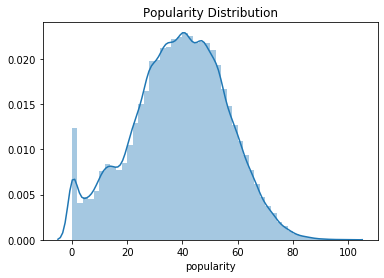

In [425]:
sns.distplot(df.popularity)
plt.title("Popularity Distribution")
plt.show()

In [426]:
df[df["popularity"] ==0]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,number_of_songs
number_of_songs,,,,,,,,,,,,,,,,,,,
209844,Movie,Leopold Stokowski,"""Balance Test"" March",5xQUl7vIMxMDCsvSFClddy,0,0.246,0.382,104800,0.379,0.898000,G#,0.5940,-16.173,Major,0.0418,125.840,4/4,0.6470,209844
224141,Movie,Audra McDonald,"""Now I'll Take a Little Break Right Here...""",1WpqjjdwaT0QsxpywFWjJf,0,0.574,0.580,17213,0.454,0.000000,A,0.8920,-21.925,Minor,0.9640,175.190,1/4,0.6070,224141
211542,Movie,Amy Adams,"""That Spells Reno""",4uiXYP0nEkZhJnldot488W,0,0.800,0.710,18173,0.379,0.000000,F,0.4880,-10.218,Major,0.7850,57.211,4/4,0.4530,211542
185586,Jazz,Larry Carlton,'Til I Hurt You,4syffKr9eyWStVQ7nZMnil,0,0.103,0.517,257640,0.638,0.000000,F,0.0725,-6.455,Major,0.0446,165.139,4/4,0.6200,185586
188089,Soul,Brandy,(Everything I Do) I Do It for You,5YKROw3C2WKsK5TW6BMeWm,0,0.308,0.571,250000,0.566,0.000003,C#,0.1120,-5.225,Major,0.0294,131.828,4/4,0.3490,188089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96689,Classical,Wolfgang Amadeus Mozart,別れの歌 - バイオリンバージョン,27nmRYiCthqcwzxOzepmuc,0,0.994,0.320,144000,0.272,0.911000,F,0.1140,-10.214,Minor,0.0471,180.035,4/4,0.3610,96689
96477,Classical,Wolfgang Amadeus Mozart,小さなジーグ - バイオリンバージョン,4aY1bFAo9Le5Mz1Fi7MlNl,0,0.980,0.298,81333,0.262,0.828000,G,0.2710,-10.627,Major,0.0445,90.593,3/4,0.2710,96477
96510,Classical,Wolfgang Amadeus Mozart,小葬送行進曲 ハ短調 K.453a - バイオリンバージョン,3vc0CN2sBYs7MqhftcW9Fi,0,0.987,0.283,48000,0.217,0.841000,C,0.0961,-12.918,Minor,0.0460,90.149,4/4,0.0473,96510


#### As we can see there are 3057 records that have 0 Popularity. We will not consider those records.

In [427]:
df2 = df[df["popularity"] != 0]  # Records having no zero popularity
df2

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,number_of_songs
number_of_songs,,,,,,,,,,,,,,,,,,,
225008,Opera,Maria Callas,""" La Traviata "" : Amami Alfredo (Act II) - Dig...",0wtpkz93wATDkUExJVuXEl,31,0.993000,0.364,131933,0.2750,0.028400,F,0.293,-11.832,Major,0.0430,86.096,4/4,0.0394,225008
112167,Hip-Hop,Rae Sremmurd,"""42"" - From SR3MM",5lf91lPnGKtIqsgmG1z8Ip,53,0.002750,0.968,238020,0.5630,0.000000,C#,0.108,-6.744,Major,0.1250,130.039,4/4,0.3240,112167
148076,Indie,The Gaslight Anthem,"""45""",25Sd73fleKUVPNqITPZkn1,48,0.000696,0.315,202493,0.9700,0.000000,G#,0.277,-4.709,Major,0.1020,178.068,4/4,0.4230,148076
165690,Rock,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,199413,0.8040,0.000000,G#,0.111,-4.299,Major,0.0303,95.980,4/4,0.7140,165690
195068,Soundtrack,Howard Shore,"""A Far Green Country""",1U5wqqEATmbCpSqADvSqy9,41,0.314000,0.218,87920,0.0832,0.962000,C,0.208,-23.025,Major,0.0366,72.023,4/4,0.0795,195068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35886,Pop,GOT7,하드캐리 Hard Carry,7Cd4glTUgV0vr0DBncEg8S,63,0.014800,0.700,193579,0.8730,0.000000,C#,0.343,-2.901,Major,0.0869,99.972,4/4,0.6120,35886
221540,World,Park Hyo Shin,해줄 수 없는 일 Haejul Su Eomneun Il,3Kk075LR7Bj2bUH1mB3TIZ,30,0.729000,0.332,260600,0.4930,0.000000,C,0.165,-6.126,Major,0.0318,110.024,4/4,0.1550,221540
34904,Pop,Day6,행복했던 날들이었다 days gone by,3TE3SbiWrm69WyUl8BlZEV,64,0.002110,0.613,205149,0.8740,0.000000,C,0.134,-3.712,Minor,0.0335,102.975,4/4,0.6510,34904


In [428]:
df2.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,number_of_songs
count,150566.000000,150566.000000,150566.000000,1.505660e+05,150566.000000,150566.000000,150566.000000,150566.000000,150566.000000,150566.000000,150566.000000,150566.000000
mean,39.206023,0.405670,0.541173,2.384582e+05,0.555497,0.171683,0.227743,-10.217471,0.134791,116.305045,0.437735,138583.040188
std,16.388830,0.366279,0.193001,1.290833e+05,0.274272,0.323258,0.216031,6.491677,0.215020,31.194098,0.266916,60121.473873
min,1.000000,0.000001,0.056900,1.664000e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,1.000000
25%,28.000000,0.048500,0.413000,1.813605e+05,0.348000,0.000000,0.097600,-12.893750,0.037100,91.046000,0.206000,102707.000000
50%,40.000000,0.287000,0.561000,2.200930e+05,0.594000,0.000058,0.129000,-8.142000,0.049900,113.949000,0.421000,146928.000000
75%,51.000000,0.794000,0.687000,2.687600e+05,0.783000,0.085975,0.279000,-5.667000,0.108000,137.979000,0.651000,188105.750000
max,100.000000,0.996000,0.987000,5.552917e+06,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000,228159.000000


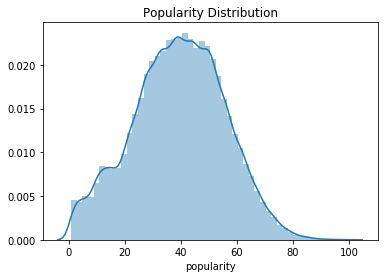

In [429]:
sns.distplot(df2.popularity)
plt.title("Popularity Distribution")
plt.show()

#### As we can see the median of popolarity is 40 and the data is almost normally distributed.

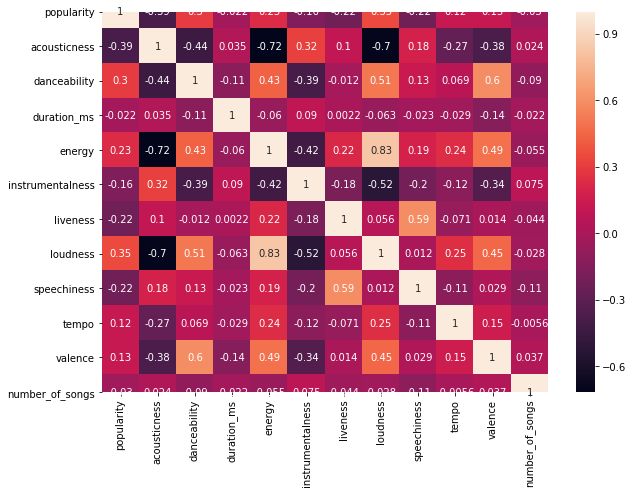

In [430]:
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(), annot = True)

In [431]:
df2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,number_of_songs
popularity,1.000000,-0.387737,0.295935,-0.022375,0.229946,-0.162545,-0.223522,0.354143,-0.219671,0.123977,0.127587,-0.030371
acousticness,-0.387737,1.000000,-0.439930,0.034892,-0.716741,0.315498,0.103387,-0.697176,0.184413,-0.267828,-0.380022,0.023850
danceability,0.295935,-0.439930,1.000000,-0.111763,0.430298,-0.389860,-0.011557,0.514172,0.133007,0.068520,0.595737,-0.090271
duration_ms,-0.022375,0.034892,-0.111763,1.000000,-0.059757,0.090460,0.002230,-0.063149,-0.023280,-0.029052,-0.138076,-0.021792
energy,0.229946,-0.716741,0.430298,-0.059757,1.000000,-0.415373,0.217536,0.825918,0.187122,0.237307,0.485030,-0.055489
instrumentalness,-0.162545,0.315498,-0.389860,0.090460,-0.415373,1.000000,-0.175549,-0.522397,-0.200975,-0.115317,-0.344759,0.074997
liveness,-0.223522,0.103387,-0.011557,0.002230,0.217536,-0.175549,1.000000,0.055910,0.592279,-0.071262,0.013654,-0.044129
loudness,0.354143,-0.697176,0.514172,-0.063149,0.825918,-0.522397,0.055910,1.000000,0.011918,0.248692,0.453713,-0.027900
speechiness,-0.219671,0.184413,0.133007,-0.023280,0.187122,-0.200975,0.592279,0.011918,1.000000,-0.108955,0.029351,-0.105397
tempo,0.123977,-0.267828,0.068520,-0.029052,0.237307,-0.115317,-0.071262,0.248692,-0.108955,1.000000,0.153261,-0.005584


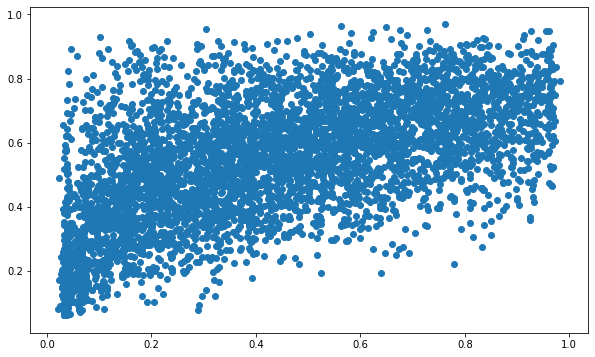

In [442]:
sam = df2.sample(n=5000)
plt.figure(figsize=(10,6))
plt.scatter(sam.valence, sam.danceability)

#### Both valence and dancebility are almost uniformly distributed. It suugests thet positive vibe in your song can make people tap their feet once in a while

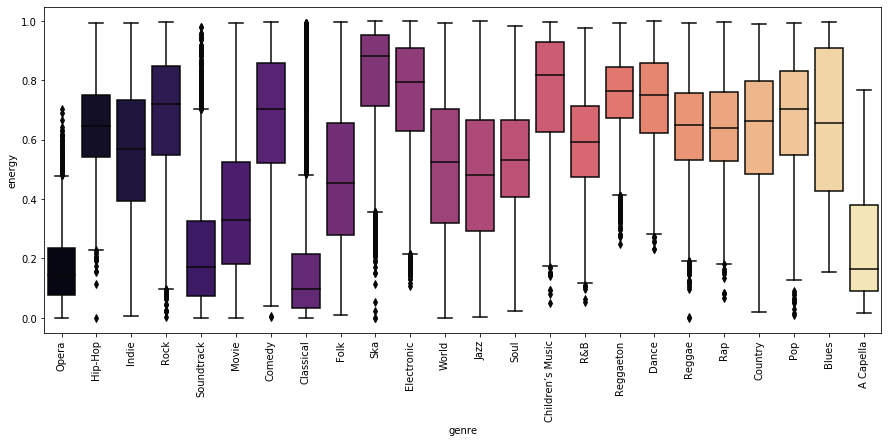

In [446]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
sns.boxplot("genre", "energy", data = df2, palette = "magma")

#### There are many outliers for Classsical genre. Classical genre is known to have soothing effect rather than high energy.

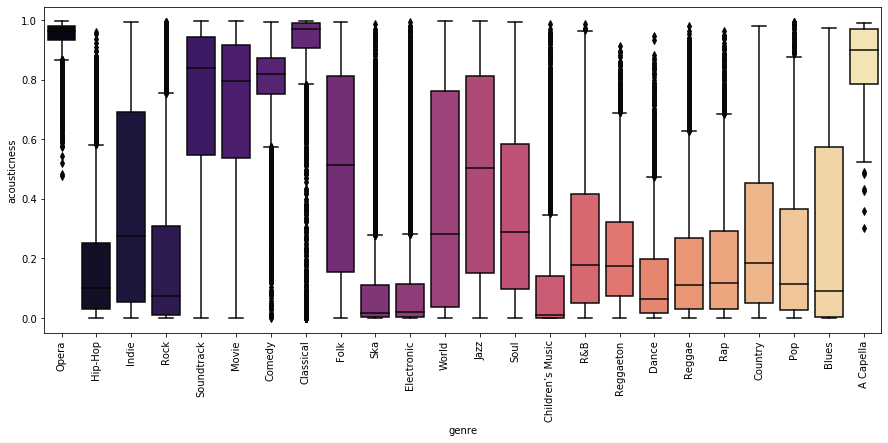

In [450]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
sns.boxplot("genre", "acousticness", data = df2, palette = "magma")

#### Classical should have high acousticness and the reverse for Children, Electronic, Dance

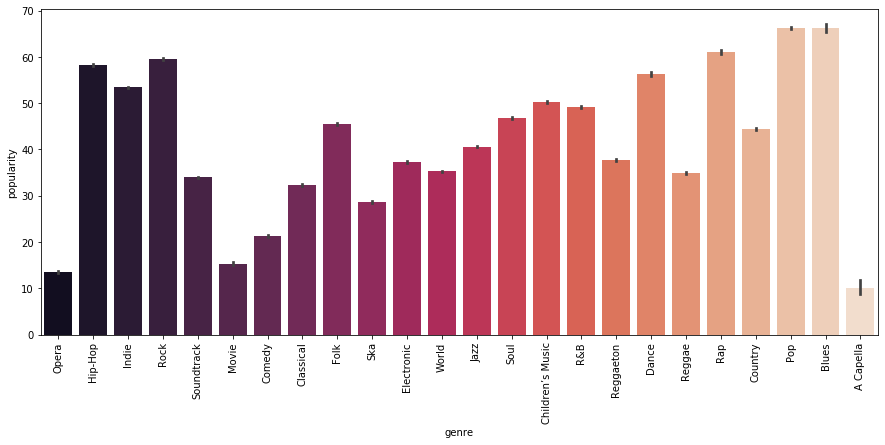

In [449]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
sns.barplot("genre", "popularity", data = df2, palette = "rocket")

#### Nowadays no one likes to listen to Opera which used to be much popular in earlier days. Pop and Blues are topping the charts nowadays.

In [432]:
top = df2.groupby("artist_name")[["popularity"]].mean().sort_values(by = "popularity", ascending = False).head(15) #Fining top artists dith mean popularity

In [433]:
top

,popularity
artist_name,
Pedro Capó,87.000000
Mario Bautista,85.000000
Mau y Ricky,83.000000
Sofia Reyes,82.000000
Ninho,82.000000
Kris Kross Amsterdam,82.000000
Martin Garrix,81.857143
Paloma Mami,81.000000
Heuss L'enfoiré,81.000000


#### Top 15 Spotify Artists

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

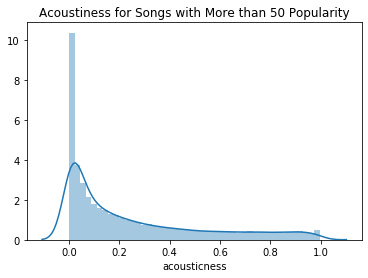

In [434]:
popular_above_50 = df2[df2.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

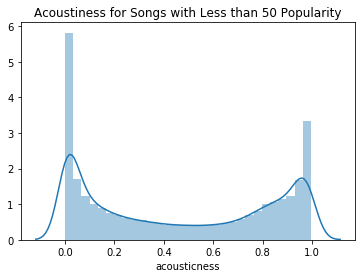

In [435]:
popular_below_50 = df2[df2.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

In [ ]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')

In [ ]:
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')

In [ ]:
#### From this analysis, there loudness" and acousticness features have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acousticness differ for songs with more than 50 popularity vs. songs with less than 50 popularity. 

In [ ]:
## Feature Engineering

In [ ]:
### There are 2 categorical variables (key and mode) that need to be converted from text to numbers using one-hot-encoding. We also define popularity as a binary variable. For our purposes, we will define above 50 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0.

In [ ]:
df2.loc[df2["mode"] == 'Major', "mode"] = 1
df2.loc[df2["mode"] == 'Minor', "mode"] = 0
df2.sample(5)

In [ ]:
### Key: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12.

In [ ]:
list_of_keys = df2['key'].unique()
for i in range(len(list_of_keys)):
    df2.loc[df2['key'] == list_of_keys[i], 'key'] = i
df2.sample(5)

In [ ]:
df2.loc[df2['popularity'] < 50, 'popularity'] = 0 
df2.loc[df2['popularity'] >= 50, 'popularity'] = 1
df2.loc[df2['popularity'] == 1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [ ]:
### For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.

In [ ]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "valence"]

In [ ]:
X = df2[features]
y = df2["popularity"]
#X_test = df2.drop(training.index)[features]
y.shape

In [ ]:
### We add a validation dataset using train_test_split.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [ ]:
### Decision Tree Classifier

In [ ]:
train_acc = []
val_acc =[]
for depth in range(2,15):
    DT_Model = DecisionTreeClassifier(max_depth = depth, class_weight='balanced')
    DT_Model.fit(X_train, y_train)
    #DT_Predict = DT_Model.predict(X_valid)
    train_acc.append(DT_Model.score(X_train, y_train))
    val_acc.append(DT_Model.score(X_valid, y_valid))

In [ ]:
frame = pd.DataFrame({"max_depth": range(2,15), "train_accuracy": train_acc, "validation_accuracy": val_acc})
frame

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(frame.max_depth, frame.train_accuracy, marker = "o")
plt.plot(frame.max_depth, frame.validation_accuracy, marker = "x")
leg = frame[["train_accuracy","validation_accuracy"]]
plt.xlabel("Depth of tree")
plt.ylabel("Performance")
plt.legend(leg)
plt.show()

In [ ]:
Model = DecisionTreeClassifier(max_depth=6,class_weight='balanced')
Model.fit(X_train, y_train)
DT_Predict = Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

In [ ]:
## Sample tree at depth = 3

In [ ]:
#plt.figure(figsize=(20,10))
#Create the tree plot
#plot_tree(DT_Model,
           #feature_names = features, #Feature names
           #class_names = ["0","1"],
           #rounded = True,
           #filled = True,
           #)
#plt.show()